# Used Cars in Egypt

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Read and explore data

In [2]:
cars_v1 = pd.read_csv('cars.csv')

In [4]:
cars_v1.head()

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


In [6]:
cars_v1.describe(include='all')

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
count,14741.000000,14741,14741,14741,14741,14741.000000,14741,14741,14741,14741,14741.000000,14741
unique,NaN,3,18,3,14,NaN,2,16,3,2,NaN,26
top,NaN,Hyundai,128,Sedan,White,NaN,Benzine,More than 200000,1600 CC,Manual,NaN,Cairo
freq,NaN,5692,2425,13453,2614,NaN,14200,2505,6762,9862,NaN,4458
mean,8934.846754,NaN,NaN,NaN,NaN,2005.456821,NaN,NaN,NaN,NaN,116.584987,NaN
std,4922.065495,NaN,NaN,NaN,NaN,12.655566,NaN,NaN,NaN,NaN,82.192718,NaN
min,812.000000,NaN,NaN,NaN,NaN,1970.000000,NaN,NaN,NaN,NaN,3.000000,NaN
25%,4497.000000,NaN,NaN,NaN,NaN,1998.000000,NaN,NaN,NaN,NaN,43.700000,NaN
50%,8182.000000,NaN,NaN,NaN,NaN,2010.000000,NaN,NaN,NaN,NaN,110.000000,NaN
75%,13373.000000,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,161.000000,NaN


In [10]:
for col in cars_v1.columns:
    print("Col is ", col)
    print(cars_v1[col].value_counts())

Col is  Unnamed: 0
5337     1
2931     1
2933     1
2934     1
2935     1
        ..
16284    1
16285    1
16286    1
16287    1
14213    1
Name: Unnamed: 0, Length: 14741, dtype: int64
Col is  Brand
Hyundai      5692
Fiat         5033
Chevrolet    4016
Name: Brand, dtype: int64
Col is  Model
128        2425
Verna      1903
Elantra    1529
Lanos      1342
Accent     1272
Optra      1252
Shahin     1142
Aveo        994
131         572
Cruze       428
Uno         350
Avante      282
Tipo        274
Punto       270
Matrix      268
Tucson      182
I10         166
Excel        90
Name: Model, dtype: int64
Col is  Body
Sedan        13453
Hatchback     1106
SUV            182
Name: Body, dtype: int64
Col is  Color
White              2614
Black              2032
Silver             1952
Gray               1670
Red                1538
Blue- Navy Blue    1406
Other Color        1134
Burgundy           1061
Green               456
Gold                374
Beige               152
Brown              

In [ ]:
cars_v1[['x', 'y']] = cars_v1['Kilometers'].str.extractall('(\d+)').unstack().loc[:,0]

In [19]:
cars_v1['x']=cars_v1['x'].astype(int)

In [54]:
cars_v1['y'].value_counts()

19999     1666
199999    1349
119999    1192
9999      1088
159999    1064
139999    1005
99999      996
179999     760
29999      612
89999      560
59999      436
69999      402
49999      372
39999      370
79999      364
Name: y, dtype: int64

In [56]:
cars_v1['y']=cars_v1['y'].astype(float)

In [57]:
cars_v1.dtypes

Unnamed: 0        int64
Brand            object
Model            object
Body             object
Color            object
Year              int64
Fuel             object
Kilometers       object
Engine           object
Transmission     object
Price           float64
Gov              object
x                 int32
y               float64
KM_Adj          float64
dtype: object

In [58]:
cars_v1['KM_Adj'] = cars_v1[['x', 'y']].mean(axis=1)

In [61]:
cars_v1.drop(['Kilometers','x','y'],axis=1, inplace= True)

In [62]:
cars_v1.head()

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Engine,Transmission,Price,Gov,KM_Adj
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,1600 CC,Automatic,140.0,Giza,149999.5
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,1000 - 1300 CC,Manual,78.0,Qena,189999.5
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,1400 - 1500 CC,Manual,70.0,Giza,149999.5
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,1600 CC,Automatic,150.0,Cairo,149999.5
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,1000 - 1300 CC,Manual,75.0,Giza,14999.5


In [63]:
cars_v1[['x', 'y']] = cars_v1['Engine'].str.extractall('(\d+)').unstack().loc[:,0]

In [68]:
cars_v1['x'] = cars_v1['x'].astype(int)

In [70]:
cars_v1['y'] = cars_v1['y'].astype(float)

In [77]:
cars_v1.loc[cars_v1['y'].isnull() , 'y'] = cars_v1['x']

In [79]:
cars_v1['CC'] = cars_v1[['x', 'y']].mean(axis=1)

In [81]:
cars_v1.drop(['x','y'],axis =1 , inplace = True)

In [84]:
cars_v1.drop(['Unnamed: 0'],axis =1 , inplace = True)

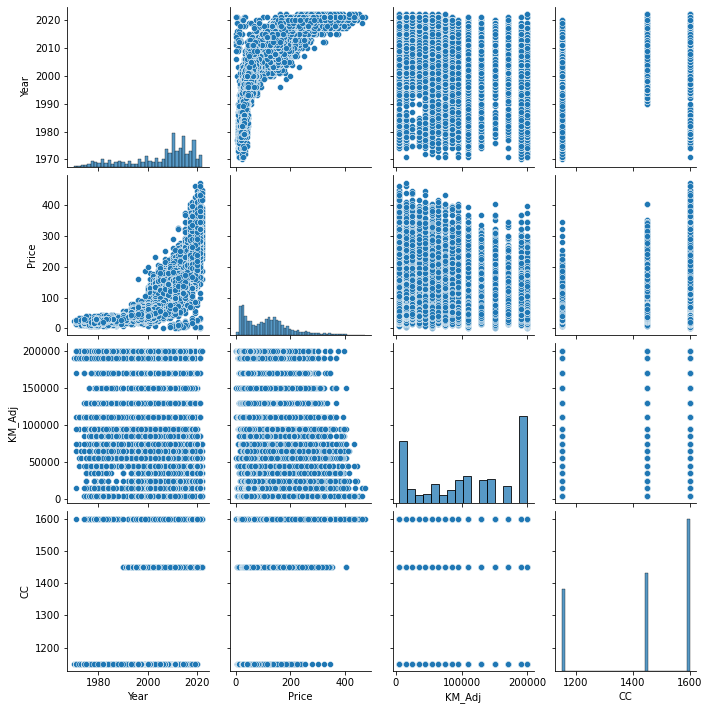

In [85]:
sns.pairplot(cars_v1)

(array([4098., 2394., 3274., 2762.,  921.,  604.,  371.,  204.,   95.,
          18.]),
 array([  3.  ,  49.85,  96.7 , 143.55, 190.4 , 237.25, 284.1 , 330.95,
        377.8 , 424.65, 471.5 ]),
 <BarContainer object of 10 artists>)

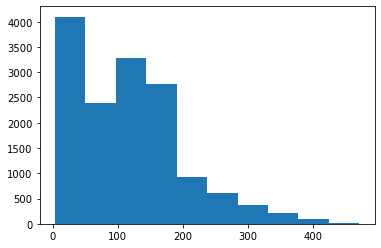

In [86]:
plt.hist(cars_v1['Price'])

## Starting the regression

In [88]:
y= cars_v1['Price']
x1 = cars_v1['Year']

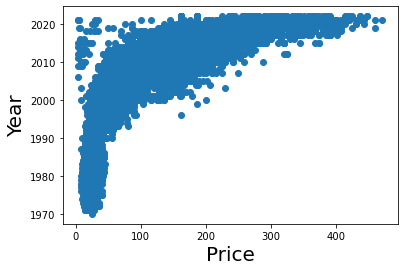

In [89]:
plt.scatter(y,x1)
plt.xlabel('Price',fontsize= 20)
plt.ylabel('Year',fontsize= 20)
plt.show()

In [90]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                 2.206e+04
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:48:49   Log-Likelihood:                -79165.
No. Observations:               14741   AIC:                         1.583e+05
Df Residuals:                   14739   BIC:                         1.584e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9968.2243     67.894   -146.821      0.000   -1.01e+04   -9835.144
Year           5.0287      0.034    148.541      0.000       4.962       5.095
==============================================================================
Omnibus:                     3085.001   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7142.836
Skew:                           1.183   Prob(JB):                         0.00
Kurtosis:                       5.455   Cond. No.                     3.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

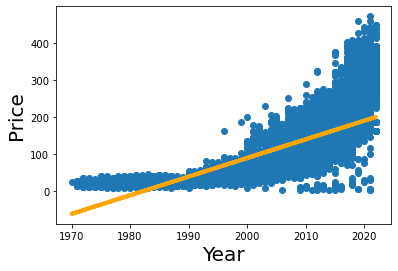

In [91]:
plt.scatter(x1,y)
y_hat = -9968.2243 + 5.0287* cars_v1['Year']
fig = plt.plot(x1, y_hat, lw=4, c= 'orange')
plt.ylabel('Price', fontsize= 20)
plt.xlabel('Year', fontsize= 20)
plt.show()

In [92]:
y= cars_v1['Price']
x1 = cars_v1[['Year', 'KM_Adj']]

In [93]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:07:33   Log-Likelihood:                -79137.
No. Observations:               14741   AIC:                         1.583e+05
Df Residuals:                   14738   BIC:                         1.583e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9842.2165     69.780   -141.045      0.000   -9978.995   -9705.438
Year           4.9684      0.035    143.121      0.000       4.900       5.036
KM_Adj     -4.757e-05   6.29e-06     -7.567      0.000   -5.99e-05   -3.52e-05
==============================================================================
Omnibus:                     2957.006   Durbin-Watson:                   0.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6662.742
Skew:                           1.148   Prob(JB):                         0.00
Kurtosis:                       5.361   Cond. No.                     2.11e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Test OLS Assumptions

In [94]:
cars_v1['cairo'] = cars_v1['Gov']

In [95]:
cars_v1.loc[cars_v1['cairo'] == 'Cairo' , 'cairo'] = 'Cairo'

In [96]:
cars_v1.loc[cars_v1['cairo'] != 'Cairo' , 'cairo'] = 'Not_Cairo'

In [97]:
cars_v1['cairo'].value_counts()

Not_Cairo    10283
Cairo         4458
Name: cairo, dtype: int64

In [98]:
cars_v1['cairo'] = cars_v1['cairo'].map({'Cairo':1,"Not_Cairo":0}) 

In [99]:
cars_v1['cairo'].value_counts()

0    10283
1     4458
Name: cairo, dtype: int64

In [100]:
y= cars_v1['Price']
x1 = cars_v1[['Year', 'cairo']]

In [101]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                 1.103e+04
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:49:43   Log-Likelihood:                -79165.
No. Observations:               14741   AIC:                         1.583e+05
Df Residuals:                   14738   BIC:                         1.584e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9967.9346     67.902   -146.799      0.000   -1.01e+04   -9834.838
Year           5.0285      0.034    148.508      0.000       4.962       5.095
cairo          0.2941      0.933      0.315      0.753      -1.535       2.123
==============================================================================
Omnibus:                     3084.447   Durbin-Watson:                   0.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7142.306
Skew:                           1.183   Prob(JB):                         0.00
Kurtosis:                       5.455   Cond. No.                     3.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Not Significant, Try another Factor

In [103]:
cars_v1['CC'].value_counts()

1600.0    6762
1450.0    4356
1150.0    3623
Name: CC, dtype: int64

In [104]:
cars_v1['new_CC'] = cars_v1['CC'].map({1600.0:1, 1450.0:0 ,1150.0:0 })

In [106]:
cars_v1['new_CC'].value_counts()

0    7979
1    6762
Name: new_CC, dtype: int64

In [107]:
y= cars_v1['Price']
x1 = cars_v1[['Year', 'new_CC']]

In [108]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                 1.441e+04
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:53:26   Log-Likelihood:                -77923.
No. Observations:               14741   AIC:                         1.559e+05
Df Residuals:                   14738   BIC:                         1.559e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8630.5232     67.498   -127.863      0.000   -8762.828   -8498.218
Year           4.3515      0.034    129.001      0.000       4.285       4.418
new_CC        44.5645      0.857     52.020      0.000      42.885      46.244
==============================================================================
Omnibus:                     3154.650   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8964.914
Skew:                           1.128   Prob(JB):                         0.00
Kurtosis:                       6.083   Cond. No.                     3.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Car CC is significant, maybe without combining is better, but now we are trying the binary

In [109]:
new_data =pd.DataFrame({'const':1, 'Year':[1990, 2015],'new_CC':[0,1]})
new_data = new_data[['const','Year','new_CC']]
new_data

,const,Year,new_CC
0,1,1990,0
1,1,2015,1


In [111]:
predections = results.predict(new_data)
predections

0     28.882579
1    182.233613
dtype: float64

In [124]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('blue')
    return cols
# Create the colors list using the function above
cols=pltcolor(cars_v1['new_CC'])


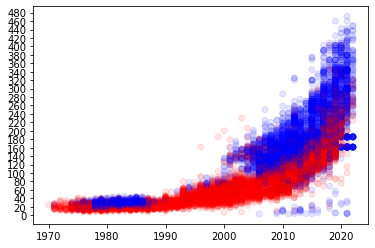

In [128]:
plt.yticks(np.arange(0, 500, step=20))
plt.scatter(cars_v1['Year'],cars_v1['Price'],alpha = .1, c=cols)


## Using SKLearn

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
x = cars_v1['Year']
y = cars_v1['Price']

In [132]:
x.shape, y.shape

((14741,), (14741,))

In [137]:
x_matrix = x.values.reshape(-1,1)

In [138]:
reg = LinearRegression()

In [140]:
reg.fit(x_matrix,y)

LinearRegression()

In [141]:
reg.score(x_matrix, y)

0.5995221119507614

In [143]:
reg.coef_

array([5.02868432])

In [144]:
reg.intercept_

-9968.224279816577

In [153]:
reg.predict([[2023]])

array([204.80409602])

In [154]:
new_data = pd.DataFrame(data= [2000,2003,2005],columns =['Year'])
new_data

,Year
0,2000
1,2003
2,2005


In [155]:
reg.predict(new_data)

D:\Data_Science\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 89.1443567 , 104.23040966, 114.28777829])

In [156]:
new_data['Predectied_Price']= reg.predict(new_data)
new_data

D:\Data_Science\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Year,Predectied_Price
0,2000,89.144357
1,2003,104.230410
2,2005,114.287778


In [157]:
x = cars_v1[['Year','new_CC']]
y = cars_v1['Price']

In [158]:
reg= LinearRegression()
reg.fit(x,y)

LinearRegression()

In [159]:
reg.coef_

array([ 4.3514602 , 44.56452889])

In [160]:
reg.intercept_

-8630.523223118082

### Formula for adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [164]:
r2 = reg.score(x,y)

n = x.shape[0]

p = x.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.6616009314286118

## Feature selection

In [166]:
from sklearn.feature_selection import f_regression

In [168]:
f_regression(x,y)
# 0 : f statistics
# 1 : p value
p_values = f_regression(x,y)[1]
p_values.round(3)
# P Value should be less than 5% to be significant


array([0., 0.])

## Standrization

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [170]:
scaler.fit(x)

StandardScaler()

In [179]:
x_scalled = scaler.transform(x)

## Regression with Scalled features

In [180]:
reg= LinearRegression()
reg.fit(x_scalled,y)

LinearRegression()

In [182]:
reg.coef_

array([55.06832355, 22.20619705])

In [183]:
reg.intercept_

116.5849874499691

In [186]:
r2 = reg.score(x_scalled,y)
n = x_scalled.shape[0]
p = x_scalled.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.6616009314286119

In [189]:
reg_summary = pd.DataFrame([['Intercept'],['Year'],["new_CC"]],columns=['features'])
reg_summary['weight'] = reg.intercept_, reg.coef_[0],reg.coef_[1]  

In [190]:
reg_summary

,features,weight
0,Intercept,116.584987
1,Year,55.068324
2,new_CC,22.206197


In [197]:
new_data2 =pd.DataFrame({'Year':[1990, 2015,1990,2015],'new_CC':[0,1,1,0]})
new_data2 = new_data2[['Year','new_CC']]
new_data2

,Year,new_CC
0,1990,0
1,2015,1
2,1990,1
3,2015,0


In [198]:
reg.predict(new_data2)

D:\Data_Science\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([109702.54885003, 111101.46313581, 109724.75504708, 111079.25693875])

In [199]:
new_data2_scalled= scaler.transform(new_data2)

In [200]:
reg.predict(new_data2_scalled)

array([ 28.88257921, 182.23361315,  73.44710809, 137.66908426])

D:\Data_Science\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

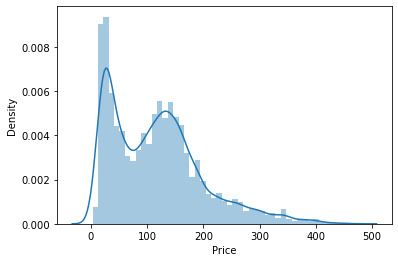

In [217]:
sns.distplot(cars_v1['Price'])

In [218]:
price_log = np.log(cars_v1['Price'])

D:\Data_Science\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

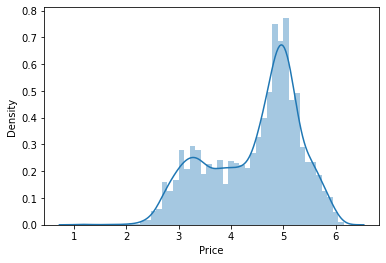

In [219]:
sns.distplot(price_log)

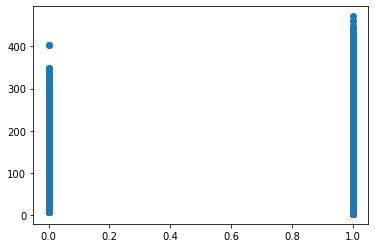

In [228]:
plt.scatter(cars_v1['new_CC'],cars_v1['Price'])

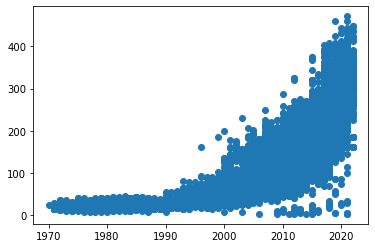

In [231]:
plt.scatter(cars_v1['Year'],cars_v1['Price'])

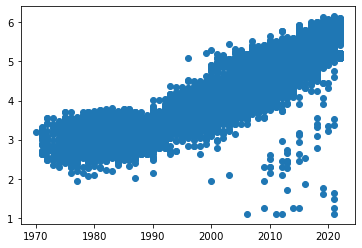

In [230]:
plt.scatter(cars_v1['Year'],price_log)

## Multicollinearity

In [232]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [234]:
cars_v1.columns.values

array(['Brand', 'Model', 'Body', 'Color', 'Year', 'Fuel', 'Engine',
       'Transmission', 'Price', 'Gov', 'KM_Adj', 'CC', 'cairo', 'new_CC'],
      dtype=object)

In [241]:
variables = cars_v1[['Year', 'Price','KM_Adj', 'new_CC']]

In [242]:
vif = pd.DataFrame()

In [243]:
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables .shape[1])]

In [244]:
vif['features'] = variables.columns

In [246]:
#values between 1 and 5 are good
# 10 is not acceptable
vif

,VIF,features
0,6.782124,Year
1,4.369353,Price
2,3.582898,KM_Adj
3,2.564681,new_CC


In [251]:
cars_v1.describe(include='all')

,Brand,Model,Body,Color,Year,Fuel,Engine,Transmission,Price,Gov,KM_Adj,CC,cairo,new_CC
count,14741,14741,14741,14741,14741.000000,14741,14741,14741,14741.000000,14741,14741.000000,14741.000000,14741.000000,14741.000000
unique,3,18,3,14,NaN,2,3,2,NaN,26,NaN,NaN,NaN,NaN
top,Hyundai,128,Sedan,White,NaN,Benzine,1600 CC,Manual,NaN,Cairo,NaN,NaN,NaN,NaN
freq,5692,2425,13453,2614,NaN,14200,6762,9862,NaN,4458,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2005.456821,NaN,NaN,NaN,116.584987,NaN,108739.154874,1445.074961,0.302422,0.458721
std,NaN,NaN,NaN,NaN,12.655566,NaN,NaN,NaN,82.192718,NaN,69890.280273,180.053030,0.459323,0.498310
min,NaN,NaN,NaN,NaN,1970.000000,NaN,NaN,NaN,3.000000,NaN,4999.500000,1150.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1998.000000,NaN,NaN,NaN,43.700000,NaN,34999.500000,1450.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,2010.000000,NaN,NaN,NaN,110.000000,NaN,109999.500000,1450.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,161.000000,NaN,189999.500000,1600.000000,1.000000,1.000000


## Get Dummies

In [252]:
cars_dummies = pd.get_dummies(cars_v1,prefix=['Brand', 'Body'], columns=['Brand', 'Body'], drop_first=True)

In [258]:
cars_dummies.drop(['cairo','new_CC'],axis= 1, inplace= True)

In [260]:
cars_dummies['log_price']= np.log(cars_dummies['Price'])

In [262]:
cars_dummies.columns

Index(['Model', 'Color', 'Year', 'Fuel', 'Engine', 'Transmission', 'Price',
       'Gov', 'KM_Adj', 'CC', 'Brand_Fiat', 'Brand_Hyundai', 'Body_SUV',
       'Body_Sedan', 'log_price'],
      dtype='object')

## Linear Regression 

In [264]:
targets = cars_dummies['log_price']
inputs = cars_dummies.drop(['Model', 'Color','Fuel', 'Engine', 'Transmission', 'Price','Gov','CC','log_price'], axis= 1)

In [265]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [266]:
scaler.fit(inputs)

StandardScaler()

In [267]:
inputs_scaled = scaler.transform(inputs)

## Train Test Split

In [220]:
from sklearn.model_selection import train_test_split

In [268]:
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size= .2, random_state= 42)

In [269]:
reg = LinearRegression()

In [270]:
reg.fit(X_train,y_train)

LinearRegression()

In [272]:
y_hat = reg.predict(X_train)

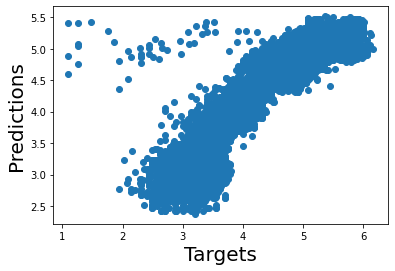

In [275]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets', fontsize= 20)
plt.ylabel('Predictions', fontsize= 20)
plt.show()

D:\Data_Science\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

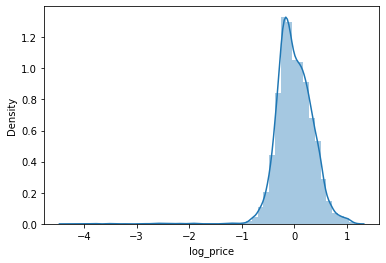

In [276]:
sns.distplot(y_train - y_hat)

#Diff are normal with mean of zero

In [278]:
reg.score(X_train, y_train)

0.827772794127398

In [281]:
reg.intercept_

4.449310558911252

In [282]:
reg.coef_

array([ 0.63839467, -0.02108024, -0.15173085,  0.04714382, -0.03700554,
       -0.05535697])

In [283]:
reg_sum = pd.DataFrame(inputs.columns.values, columns =['features'])
reg_sum['weights'] = reg.coef_
reg_sum

,features,weights
0,Year,0.638395
1,KM_Adj,-0.021080
2,Brand_Fiat,-0.151731
3,Brand_Hyundai,0.047144
4,Body_SUV,-0.037006
5,Body_Sedan,-0.055357


## Testing

In [285]:
y_hat_test = reg.predict(X_test)

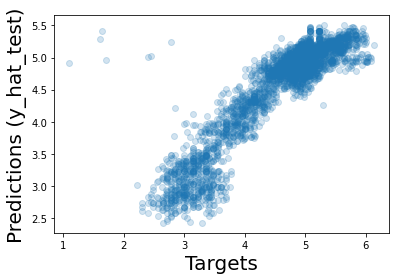

In [287]:
plt.scatter(y_test,y_hat_test, alpha =.2)
plt.xlabel('Targets', fontsize= 20)
plt.ylabel('Predictions (y_hat_test)', fontsize= 20)
plt.show()

In [299]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns =['Prediction'])
df_pf

,Prediction
0,194.433879
1,179.646652
2,173.143321
3,95.367831
4,48.374679
...,...
2944,106.130016
2945,101.903494
2946,132.192594
2947,51.685648


In [300]:
y_test= y_test.reset_index(drop=True)

In [301]:
df_pf['Target'] = np.exp(y_test)

In [302]:
df_pf.head()

,Prediction,Target
0,194.433879,258.8
1,179.646652,212.8
2,173.143321,149.5
3,95.367831,130.0
4,48.374679,43.0


In [303]:
df_pf['Residual']= df_pf['Target'] - df_pf['Prediction']

In [304]:
df_pf

,Prediction,Target,Residual
0,194.433879,258.8,64.366121
1,179.646652,212.8,33.153348
2,173.143321,149.5,-23.643321
3,95.367831,130.0,34.632169
4,48.374679,43.0,-5.374679
...,...,...,...
2944,106.130016,135.0,28.869984
2945,101.903494,140.0,38.096506
2946,132.192594,85.0,-47.192594
2947,51.685648,46.0,-5.685648


In [319]:
df_pf['Diff%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100).round(decimals=2)
df_pf

,Prediction,Target,Residual,Diff%
0,194.433879,258.8,64.366121,24.87
1,179.646652,212.8,33.153348,15.58
2,173.143321,149.5,-23.643321,15.81
3,95.367831,130.0,34.632169,26.64
4,48.374679,43.0,-5.374679,12.50
...,...,...,...,...
2944,106.130016,135.0,28.869984,21.39
2945,101.903494,140.0,38.096506,27.21
2946,132.192594,85.0,-47.192594,55.52
2947,51.685648,46.0,-5.685648,12.36


In [320]:
df_pf.describe()

,Prediction,Target,Residual,Diff%
count,2949.000000,2949.000000,2949.000000,2949.000000
mean,109.970049,119.555680,9.585631,31.897986
std,58.660083,83.287642,48.077432,147.508638
min,11.273800,3.000000,-220.185765,0.020000
25%,53.996347,46.000000,-16.945430,11.270000
50%,122.323310,115.000000,-0.258770,21.640000
75%,154.416791,161.400000,21.903266,34.860000
max,245.541000,460.000000,302.881023,4478.830000


In [ ]:
#pd.options.display.max_rows = 999
#pd.set_options('display.float_format', lambda x:"%.2f%" % x)

In [321]:
f_regression(X_test,y_test)

(array([1.27346179e+04, 1.62972740e+02, 3.82886607e+03, 5.96788555e+02,
        1.75220808e+01, 3.98576639e+00]),
 array([0.00000000e+000, 2.28937348e-036, 0.00000000e+000, 3.50056158e-120,
        2.92302443e-005, 4.59780673e-002]))

## Using All Data

#### Get Dummies

In [329]:
cars_v1.head()
cars_v2= cars_v1.drop(['CC',"cairo",'new_CC'],axis=1)

In [331]:
cars_v2['log_price']= np.log(cars_v2['Price'])

In [332]:
cars_v2.drop(['Price'],axis= 1, inplace= True)

In [338]:
cars_v2 = pd.get_dummies(cars_v2, drop_first=True)

In [347]:
targets = cars_v2['log_price']
inputs = cars_v2.drop(['log_price'], axis= 1)

In [348]:
inputs.head()

,Year,KM_Adj,Brand_Fiat,Brand_Hyundai,Model_131,Model_Accent,Model_Avante,Model_Aveo,Model_Cruze,Model_Elantra,...,Gov_Monufia,Gov_New Valley,Gov_Port Said,Gov_Qalyubia,Gov_Qena,Gov_Red Sea,Gov_Sharqia,Gov_Sohag,Gov_South Sinai,Gov_Suez
0,2007,149999.5,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2005,189999.5,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1999,149999.5,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009,149999.5,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,14999.5,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [349]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)


In [350]:

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size= .2, random_state= 42)
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [351]:

y_hat = reg.predict(X_train)


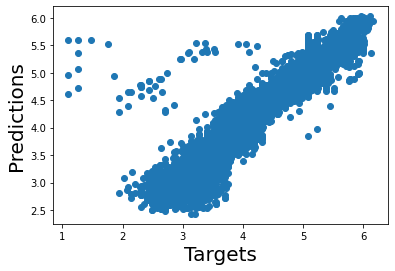

In [352]:

plt.scatter(y_train,y_hat)
plt.xlabel('Targets', fontsize= 20)
plt.ylabel('Predictions', fontsize= 20)
plt.show()



In [353]:

reg.score(X_train, y_train)

reg.coef_

reg_sum = pd.DataFrame(inputs.columns.values, columns =['features'])
reg_sum['weights'] = reg.coef_
reg_sum

,features,weights
0,Year,4.969610e-01
1,KM_Adj,-1.682569e-03
2,Brand_Fiat,-4.429173e+10
3,Brand_Hyundai,1.400403e+10
4,Model_131,3.452594e-02
...,...,...
60,Gov_Red Sea,7.672787e-03
61,Gov_Sharqia,-1.606464e-03
62,Gov_Sohag,1.432896e-03
63,Gov_South Sinai,1.009703e-03


In [354]:
y_hat_test = reg.predict(X_test)

In [355]:
y_test= y_test.reset_index(drop=True)

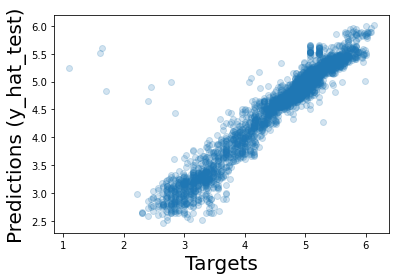

In [356]:
plt.scatter(y_test,y_hat_test, alpha =.2)
plt.xlabel('Targets', fontsize= 20)
plt.ylabel('Predictions (y_hat_test)', fontsize= 20)
plt.show()

In [357]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns =['Prediction'])
df_pf

,Prediction
0,225.329036
1,211.546267
2,129.327479
3,114.999917
4,50.128709
...,...
2944,138.513329
2945,139.306055
2946,94.444913
2947,49.638902


In [358]:
df_pf['Target'] = np.exp(y_test)

In [359]:
df_pf.head()

,Prediction,Target
0,225.329036,258.8
1,211.546267,212.8
2,129.327479,149.5
3,114.999917,130.0
4,50.128709,43.0


In [360]:
df_pf['Residual']= df_pf['Target'] - df_pf['Prediction']

df_pf['Diff%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100).round(decimals=2)
df_pf

,Prediction,Target,Residual,Diff%
0,225.329036,258.8,33.470964,12.93
1,211.546267,212.8,1.253733,0.59
2,129.327479,149.5,20.172521,13.49
3,114.999917,130.0,15.000083,11.54
4,50.128709,43.0,-7.128709,16.58
...,...,...,...,...
2944,138.513329,135.0,-3.513329,2.60
2945,139.306055,140.0,0.693945,0.50
2946,94.444913,85.0,-9.444913,11.11
2947,49.638902,46.0,-3.638902,7.91


In [373]:
p_value_table =  pd.DataFrame (data = inputs.columns, columns = ['Features' ]) 

In [375]:
p_value_table['weights'] = f_regression(X_test,y_test)[1]

In [378]:
p_value_table.sort_values('weights')

,Features,weights
0,Year,0.000000e+00
2,Brand_Fiat,0.000000e+00
39,Transmission_Manual,3.854971e-315
38,Engine_1600 CC,2.967835e-198
3,Brand_Hyundai,3.500562e-120
...,...,...
24,Color_Blue- Navy Blue,8.544123e-01
62,Gov_Sohag,8.564710e-01
52,Gov_Luxor,8.804858e-01
49,Gov_Giza,9.314950e-01


In [379]:
# Gov is not Relevant, should be removed

In [381]:
reg.score(X_test, y_test)

0.9107993978077813

In [382]:
# r2 for 

r2 = reg.score(X_train,y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9050039208760138

In [383]:
r2 = reg.score(X_test,y_test)

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9087882846816994